## The Eighth Lab-assignment (08/09/2022 11:59'AM' - 08/12/2022 11:59PM, 50 points in total)

The purpose of this assignment is to practice different Hypothesis Testing and annotation quality evaluation.

### Question 1 (10 points) 

During the 1980s, the general consensus is that about 5% of the nation’s children had autism. Some claimed that increases certain chemicals in the environment has led to an increase in autism. 

(1) Write an appropriate hypothesis test for this situation (5 points).  

(2) Give an appropriate test for this hypothesis, stating what are the necessary conditions for performing the test (5 points). 

(3) A recent study examined 384 children and found that 46 showed signs of autism. Perform a test of the hypothesis and state the p-value (5 points). 

#You answer here

#1) 

Null Hypothesis : It estimates that approximately 5% of children has autism in the country.
        H0: P1 = 0.05

Alternate Hypothesis: It estimates that more than 5% of children has autism in the country.
        H1: P1 > 0.05

#2)

Here we have sample more than 30, so I'm going to use Z-test, if we have sample less than 30, we can use T-Test


In [46]:
# your code here
from statsmodels.stats.proportion import proportions_ztest

population_N = 384

print("Z-stat value is", proportions_ztest(count = 5, nobs = population_N, value = 0.46)[0])
print("p-value is", proportions_ztest(count = 5, nobs = population_N, value = 0.46)[1])

Z-stat value is -77.2644132497523
p-value is 0.0


### Question 2 (10 points) 
In this problem,we will examine the sugar content of several national brands of cereals, here measured as a percentage of weight.

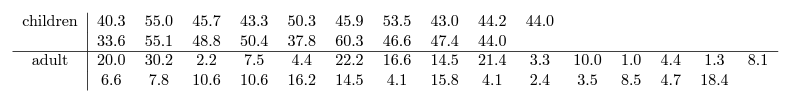

(1) Give a summary of these two datasets (5 points). 

(2) Create side-by-side boxplots and interpret what you see (5 points). 

(3) Use python to create a 95% confidence interval for the difference in mean sugar content and explain your result (5 points). 

In [47]:
# You answer here
import numpy as np

childrens = [40.3, 55.0, 45.7, 43.3, 50.3, 45.9, 53.5, 43.0, 44.2, 44.0, 33.6, 55.1, 48.8,50.4, 37.8, 60.3, 46.6, 47.4, 44.0]
adults = [20.0, 30.2, 2.2, 7.5, 4.4, 22.2, 16.6, 14.5, 21.4, 3.3, 10.0, 1.0, 4.4, 1.3, 8.1, 6.6, 7.8, 10.6, 16.2, 14.5,
        4.1, 15.8, 4.1, 2.4, 3.5, 8.5, 4.7, 18.4]

# children 
print ('Childrens  ')
print ('Mean : ',np.mean(childrens))
print ('Median : ',np.median(childrens))
print ('Standard Deviation : ', np.std(childrens))
print ('Minimum : ', np.min(childrens))
print ('Maximum : ', np.max(childrens))
print ('Length : ', len(childrens))


#Adult
print ('Adults ')
print ('Mean : ',np.mean(adults))
print ('Median : ',np.median(adults))
print ('Standard Deviation : ', np.std(adults))
print ('Minimum : ', np.min(adults))
print ('Maximum : ', np.max(adults))
print ('Length : ', len(adults))

Childrens  
Mean :  46.800000000000004
Median :  45.9
Standard Deviation :  6.24718884147523
Minimum :  33.6
Maximum :  60.3
Length :  19
Adults 
Mean :  10.153571428571427
Median :  7.949999999999999
Standard Deviation :  7.475220118252474
Minimum :  1.0
Maximum :  30.2
Length :  28


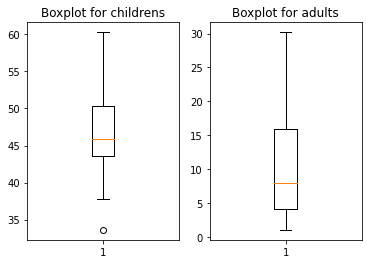

In [48]:
# your code here
import matplotlib.pyplot as plt

plt.subplot(1, 2, 1) # quadrant 1
plt.boxplot(childrens)
plt.title("Boxplot for childrens")
plt.subplot(1, 2, 2) # quadrant 2
plt.boxplot(adults)
plt.title("Boxplot for adults")
plt.show()

there are more children than adults, on average. In contrast to adults, where there are no outliers, the median for children is almost close to the mean (as estimated above).

In [49]:
import numpy as np
import scipy.stats as st

# create 95% confidence interval
print("The 95% confidence interval for sugar content for childrens are ", st.t.interval(alpha=0.95,df=len(childrens)-1,
                                                                            loc=np.mean(childrens),scale=st.sem(childrens)))

print("The 95% confidence interval for sugar content for adult are ",st.t.interval(alpha=0.95,df=len(adults)-1,
                                                                                   loc=np.mean(adults), scale=st.sem(adults)))

The 95% confidence interval for sugar content for childrens are  (43.706441602172454, 49.893558397827555)
The 95% confidence interval for sugar content for adult are  (7.201794131005471, 13.105348726137382)


### Question 3 (30 points) 

Cohen's kappa coefficient (κ) is a statistic that is used to measure inter-rater reliability (and also intra-rater reliability) for qualitative (categorical) items. It is generally thought to be a more robust measure than simple percent agreement calculation, as κ takes into account the possibility of the agreement occurring by chance. There is controversy surrounding Cohen's kappa due to the difficulty in interpreting indices of agreement. Some researchers have suggested that it is conceptually simpler to evaluate disagreement between items.

A more detailed description of Kappa agreement can be found on wikipedia: https://en.wikipedia.org/wiki/Cohen%27s_kappa

Here is the dataset we created for a text classification task: https://github.com/suthapalliuday/INFO5502-Summer2022/blob/main/datasets/lab08-dataset.csv

The last three columns indicate the annotation on the same sentence by three students respectively. Based on this dataset, please calculate the Cohen's kappa and the Fleiss' kappa using their formulars (Python). Please don't use any existing packages for the implementation. 

In [50]:
import os
os.chdir("C:\\Users\\Sasi9\\Downloads\\INFO5502-Summer2022-main\\INFO5502-Summer2022-main\\datasets\\")

In [51]:
# your code here
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

# read data 
data = pd.read_csv("lab08-dataset.csv")
data.head()


,Title of Article,Contributions,Source,Annotation1,Annotation2,Annotation3,Year
0,The measurement of ÒinterdisciplinarityÓ and Ò...,"In this study, we discuss recent advances in t...",JASIST,Algorithms/ Methods Construction or Optimization,Algorithms/ Methods Construction or Optimization,Algorithms/ Methods Construction or Optimization,NaN
1,Innovation adoption: Broadcasting versus virality,broadcasting and virality have similar diffusi...,JASIST,Theory proposal\n,Theory proposal\n,Theory proposal\n,NaN
2,Discovering underlying sensations of human emo...,we report the results of our study on sensatio...,JASIST,Theory proposal\n,Algorithms/ Methods Construction or Optimization,Theory proposal\n,NaN
3,Discovering underlying sensations of human emo...,"in the second part of the paper, we define nov...",JASIST,Theory proposal\n,Theory proposal\n,Theory proposal\n,NaN
4,Discovering underlying sensations of human emo...,we design a method to classify texts into ones...,JASIST,Algorithms/ Methods Construction or Optimization,Model Construction or Optimization,Algorithms/ Methods Construction or Optimization,NaN


In [52]:
# label encode the categorical columns data
Encoding = LabelEncoder()

# label encode
Encoding.fit(data['Annotation1'])

# fitting the Annotation 1 data and transforming the annotation 2 & annotation 3
data['le_Annotation1'] = le.transform(data['Annotation1'])
data['le_Annotation2'] = le.transform(data['Annotation2'])
data['le_Annotation3'] = le.transform(data['Annotation3'])

In [53]:
from sklearn.metrics import cohen_kappa_score

# finding pair-wise cohen's kappa score
score_1 = cohen_kappa_score(list(data['le_Annotation1'].values), list(data['le_Annotation2'].values))
score_2 = cohen_kappa_score(list(data['le_Annotation2'].values), list(data['le_Annotation3'].values))
score_3 = cohen_kappa_score(list(data['le_Annotation1'].values), list(data['le_Annotation3'].values))

# take average of all 3 scores
avg_k_s = (score_1 + score_2 + score_3)/3
print("Cohen's kappa score is:", round(avg_k_s, 2))

# determining agreement based on cohen kappa score
if avg_k_s < 0.0:
    print("No agreement")

elif ((avg_k_s >= 0.01) & (avg_k_s <= 0.20)):
    print("Slight agreement")

elif ((avg_k_s >= 0.21) and (avg_k_s <= 0.40)):
    print("Fair agreement")

elif ((avg_k_s >= 0.41) and (avg_k_s <= 0.60)):
    print("Moderate agreement")

elif ((avg_k_s >= 0.61) and (avg_k_s <= 0.80)):
    print("Substantial agreement")

elif ((avg_k_s >= 0.81) and (avg_k_s <= 0.99)):
    print("Perfect agreement")
    

Cohen's kappa score is: 0.54
Moderate agreement


In [54]:
import krippendorff
data1 = [list(data['le_Annotation1'].values),
        list(data['le_Annotation2'].values),
        list(data['le_Annotation3'].values)]

# fleiss kappa score
fleiss_kappa_score = krippendorff.alpha(data1)
print("Fleiss kappa score is:", round(fleiss_kappa_score, 3))

Fleiss kappa score is: 0.565
